# Guia da Camada de Rede
### A camada de rede serve para o cliente pedir uma requisição de rota entre dois pontos (Alice e Bob) e que seja atendida por uma rota escolhida e adequada.

#### IMPORTANDO AS DEPENDÊNCIAS
##### Este documento tem como objetivo demostrar a execução da camada de rede, além de suas funcionalidades. 

In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger
Logger.activate(Logger)

#### Ao importar as dependências, vamos instaciar a rede com 20 qubits em cada host e 10 pares EPRS em cada canal da topologia. 

2024-07-11 22:36:57,232: Qubit 0 adicionado à memória do Host 0.
2024-07-11 22:36:57,232: Qubit 0 criado com fidelidade inicial 0.7030724022225786 e adicionado à memória do Host 0.
2024-07-11 22:36:57,233: Qubit 1 adicionado à memória do Host 0.
2024-07-11 22:36:57,234: Qubit 1 criado com fidelidade inicial 0.5325512552048951 e adicionado à memória do Host 0.
2024-07-11 22:36:57,235: Qubit 2 adicionado à memória do Host 0.
2024-07-11 22:36:57,236: Qubit 2 criado com fidelidade inicial 0.0314994994724862 e adicionado à memória do Host 0.
2024-07-11 22:36:57,237: Qubit 3 adicionado à memória do Host 0.
2024-07-11 22:36:57,237: Qubit 3 criado com fidelidade inicial 0.9727978851383074 e adicionado à memória do Host 0.
2024-07-11 22:36:57,238: Qubit 4 adicionado à memória do Host 0.
2024-07-11 22:36:57,238: Qubit 4 criado com fidelidade inicial 0.3242331294701277 e adicionado à memória do Host 0.
2024-07-11 22:36:57,240: Qubit 5 adicionado à memória do Host 0.
2024-07-11 22:36:57,241: Qubit

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


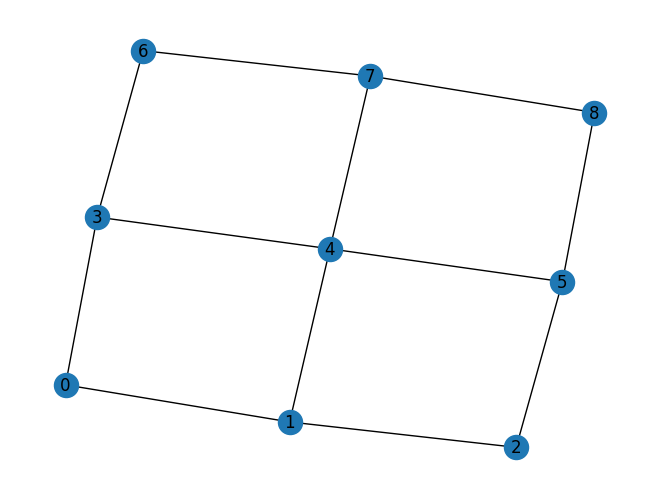

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,3)
rede.draw()

In [3]:
alice = rede.get_host(6)
bob = rede.get_host(1)

##### Nesse sentido, primeiramente precisa-se escolher a melhor rota e seus critérios são dados pela rota com menor caminho. Para verificar isso usaremos a função short_route_valid, que irá entregar uma rota válida entre Alice e Bob. 

In [4]:
rede.networklayer.short_route_valid(8,0)

2024-07-11 22:36:58,267: Rota válida encontrada: [8, 5, 2, 1, 0]


[8, 5, 2, 1, 0]

##### Para a rota ser válida, precisa-se verificar se cada canal da rede tem peloo menos 1 par EPR e se nó tem 2 qubits. Através dessas funções podemos verificar.

In [5]:
rede.networklayer.verify_channels()
rede.networklayer.verify_nodes()

2024-07-11 22:36:58,278: Há pelo menos 1 par EPR nesses canais
2024-07-11 22:36:58,279: Todos os nós possuem pelo menos 2 qubits


True

##### Dessa forma, vamos realizar o entanglement swapping entre Alice e Bob, o que permite criar um par de qubits emaranhados entre dois nós que não têm uma conexão direta de emaranhamento, utilizando pares intermediários.

In [6]:
rede.networklayer.entanglement_swapping(8,0)

2024-07-11 22:36:58,291: Rota válida encontrada: [8, 5, 2, 1, 0]
2024-07-11 22:36:58,292: Par EPR <quantumnet.objects.epr.Epr object at 0x000001DE7F307A50> adicionado ao canal (8, 2).
2024-07-11 22:36:58,294: Par EPR <quantumnet.objects.epr.Epr object at 0x000001DE73EF7A90> removido do canal (8, 5).
2024-07-11 22:36:58,296: Par EPR <quantumnet.objects.epr.Epr object at 0x000001DE73F02350> removido do canal (5, 2).
2024-07-11 22:36:58,297: Par EPR <quantumnet.objects.epr.Epr object at 0x000001DE73F02350> adicionado ao canal (8, 1).
2024-07-11 22:36:58,297: Par EPR <quantumnet.objects.epr.Epr object at 0x000001DE7F307A50> removido do canal (8, 2).
2024-07-11 22:36:58,298: Par EPR <quantumnet.objects.epr.Epr object at 0x000001DE73F02F90> removido do canal (2, 1).
2024-07-11 22:36:58,298: Par EPR <quantumnet.objects.epr.Epr object at 0x000001DE73F02F90> adicionado ao canal (8, 0).
2024-07-11 22:36:58,299: Par EPR <quantumnet.objects.epr.Epr object at 0x000001DE73F02350> removido do canal (

True

In [8]:
rede.get_eprs_from_edge(8,0)